## Final Project Submission

Please fill out:
* Student name: Kai Graham
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Predict housing prices to be used by PE shop looking for valuation help.

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# set style of graphs and visualizations
plt.style.use('ggplot')

In [4]:
# import the dataset
raw_data = pd.read_csv('kc_house_data.csv')

In [5]:
# examine the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# drop the id column as that won't be relevant
clean_data = raw_data.drop('id', axis=1)

In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [8]:
# Handle Missing Values
# waterfront, yr_renovated, view

# evaluate waterfront
clean_data['waterfront'].nunique()

2

In [9]:
clean_data['waterfront'].unique()

array([nan,  0.,  1.])

In [10]:
# how many nans are there
clean_data['waterfront'].isna().sum()

2376

In [11]:
# given how many values this is, going to keep data in for now
# set all nans to 0 as houses missing waterfront info likely are not 
# waterfront
clean_data['waterfront'] = clean_data['waterfront'].fillna(value=0.)

In [12]:
# Handle yr_renovated missing values
clean_data['yr_renovated'].nunique()

70

In [13]:
clean_data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [14]:
# how many are missing
clean_data['yr_renovated'].isna().sum()

3842

In [15]:
# similar to waterfront, assume missing data are 0's are non-renos
clean_data['yr_renovated'] = clean_data['yr_renovated'].fillna(value=0.)

In [16]:
# Handle view missing values
clean_data['view'].isna().sum()

63

In [17]:
clean_data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [18]:
# view is the number of times a house has been viewed
# set missing values to 0 with the assumption that missing values have
# no views
clean_data['view'] = clean_data['view'].fillna(value=0.)

In [19]:
# check for remaining missing values
clean_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
# no more missing values
# check for duplicates
clean_data.duplicated().sum()

0

In [21]:
# There are no duplicates -- handle strings and convert all columns
# to appropriate d type for regression
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [22]:
# only string columns are the date and sqft_basement
# evaluate sqft_basement
clean_data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [23]:
# replace '?' with zero with assumption that these do not have basements
clean_data['sqft_basement'] = clean_data['sqft_basement'].replace(to_replace='?',
                                                                      value='0.0')

In [24]:
# convert to a number format
clean_data['sqft_basement'] = clean_data['sqft_basement'].astype('float64')

In [25]:
# handle date column - convert to a datetime type and then split year, month, day
clean_data['date'] = pd.to_datetime(clean_data['date'], infer_datetime_format=True)

In [26]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21597 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [27]:
# create individual columns for year, month, and day
clean_data['year_sold'] = clean_data['date'].map(lambda x: x.year)
clean_data['month_sold'] = clean_data['date'].map(lambda x: x.month)
clean_data['day_sold'] = clean_data['date'].map(lambda x: x.day)

In [28]:
# drop date column
clean_data = clean_data.drop('date', axis=1)

In [29]:
# now we have handled missing values, duplicates, obvious weird values,
# and changed the types of columns appropriately
# check that columns are looking ok
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [30]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [31]:
import statsmodels.api as sm

y = clean_data['price']
X = clean_data.drop('price', axis=1)
predictors = sm.add_constant(X)

model = sm.OLS(y, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2417.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:20:56   Log-Likelihood:            -2.9433e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21575   BIC:                         5.889e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.701e+07   9.97e+06     -6.720      0.000   -8.66e+07   -4.75e+07
bedrooms      -3.611e+04   1895.753    -19.049      0.000   -3.98e+04   -3.24e+04
bathrooms      4.185e+04   3254.292     12.860      0.000    3.55e+04    4.82e+04
sqft_living     103.9198     18.029      5.764      0.000      68.581     139.259
sqft_lot          0.1247      0.048      2.610      0.009       0.031       0.218
floors         7567.8739   3591.816      2.107      0.035     527.649    1.46e+04
waterfront     6.192e+05   1.81e+04     34.229      0.000    5.84e+05    6.55e+05
view             5.3e+04   2116.828     25.036      0.000    4.88e+04    5.71e+04
condition      2.819e+04   2344.383     12.024      0.000    2.36e+04    3.28e+04
grade          9.714e+04   2155.383     45.068      0.000    9.29e+04    1.01e+05
sqft_above       77.0570     18.021      4.276      0.000      41.735     112.379
sqft_basement    46.7398     17.861      2.617      0.009      11.732      81.748
yr_built      -2638.3199     71.741    -36.776      0.000   -2778.938   -2497.702
yr_renovated     24.5890      3.968      6.197      0.000      16.811      32.367
zipcode        -585.0212     32.906    -17.778      0.000    -649.520    -520.522
lat            6.031e+05   1.07e+04     56.293      0.000    5.82e+05    6.24e+05
long          -2.176e+05   1.31e+04    -16.581      0.000   -2.43e+05   -1.92e+05
sqft_living15    21.6016      3.442      6.277      0.000      14.856      28.348
sqft_lot15       -0.3862      0.073     -5.279      0.000      -0.530      -0.243
year_sold      3.654e+04   4722.374      7.738      0.000    2.73e+04    4.58e+04
month_sold     1139.0264    708.874      1.607      0.108    -250.418    2528.471
day_sold       -361.6816    159.188     -2.272      0.023    -673.701     -49.662
==============================================================================
Omnibus:                    18382.670   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1863250.788
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      47.939   Cond. No.                     7.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# checking that stepwise selection is working
result = stepwise_selection(predictors, clean_data['price'], verbose=True)
print(result)

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  const                          with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Drop sqft_above                     with p-value 0.688649
Add  view                           with p-value 9.65548e-141
Add  bedrooms                       with p-value 2.23024e-47
Add  bathrooms                      with p-value 8.18615e-53
Add  zipcode                        with p-value 2.6588e-36
Add  long                           with p-value 6.12372e-61
Add  year_sold                      with p-value 2.09761e-22
Add  condition                      with p-value 7.68921e-23
Add  sqft_above                     with p-value 1.74012e-19
Add  yr_renovated             

In [33]:
# stepwise feature selection seems to be working
# evaluate distributions / relationships, etc.
# separate continious and cat variables; remove cont variables that do not meet linearity req
# run a baseline model, evaluate residuals for assumption requirements
# cross fold validation

In [34]:
# Look at dependent variable: price

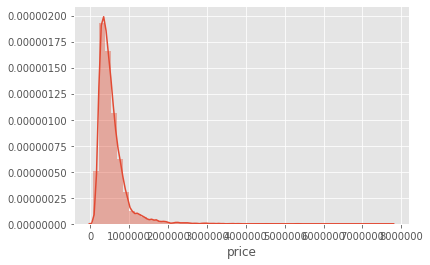

In [35]:
sns.distplot(clean_data['price'])

In [36]:
# distribution of price has significant right skew and positive outliers
# would likely benefit from log transformation -- will handle this after baseline model

In [37]:
"""
Function to help plot y vs. a chosen set of x variables
"""
def plot_x_y(x_vals, y_val, data):
    fig, axes = plt.subplots(nrows=1, ncols=len(x_vals), figsize=(20,5))
    for xcol, ax in zip(x_vals, axes):
        data.plot(kind='scatter', x=xcol, y=y_val, ax=ax, alpha=0.5)
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()

In [38]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [80]:
"""
Function to plot y vs. a chosen set of x variables
"""

def plot_relationship(data, y_vars, x_vars, height=4.5):
    grid = sns.PairGrid(data=data, y_vars=y_vars, x_vars=x_vars, height=height)
    grid.map(sns.regplot)

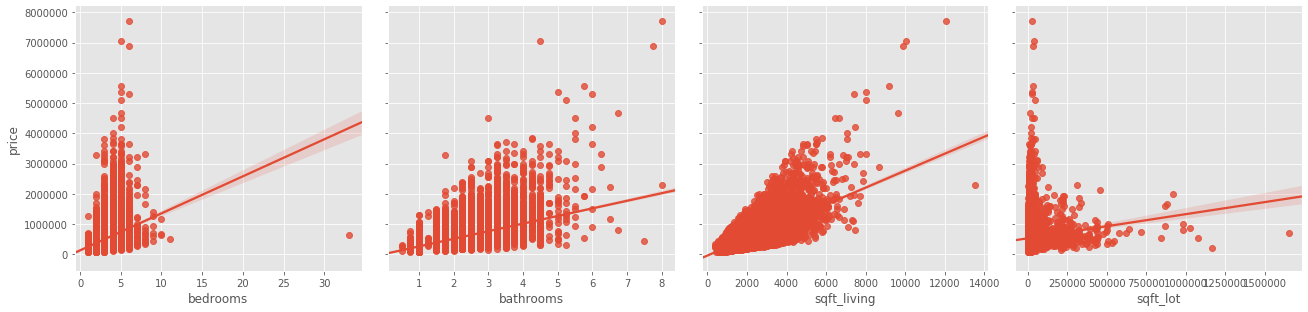

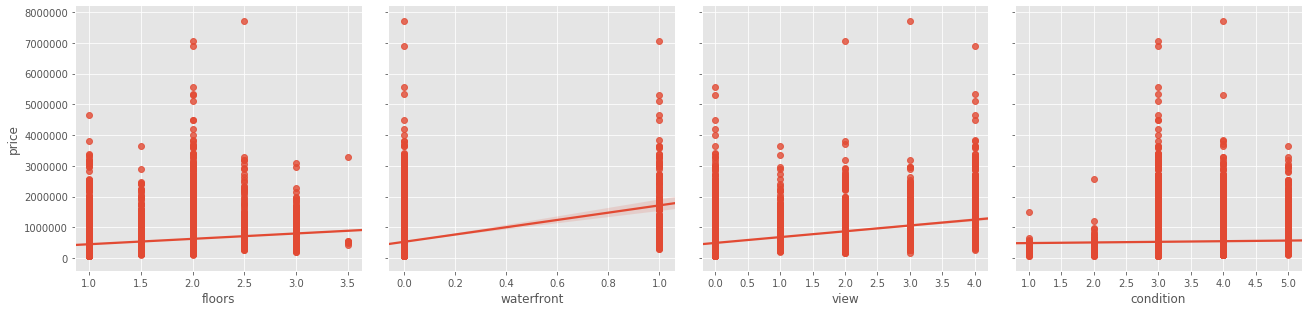

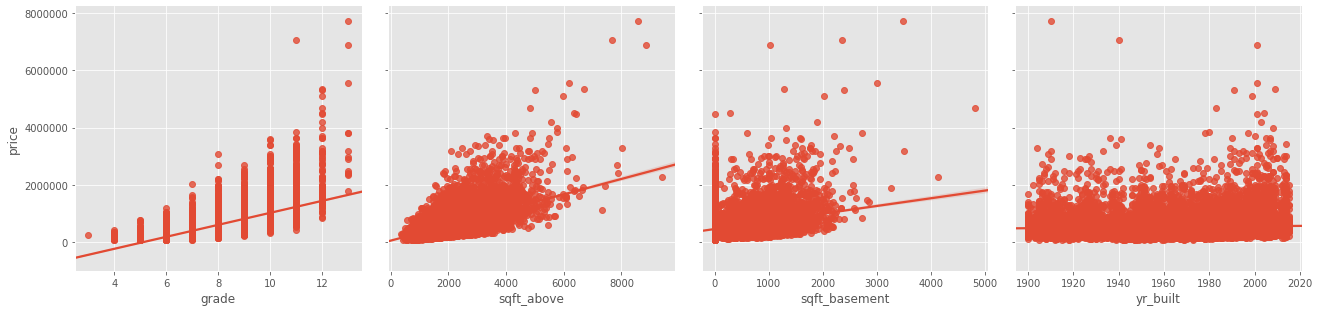

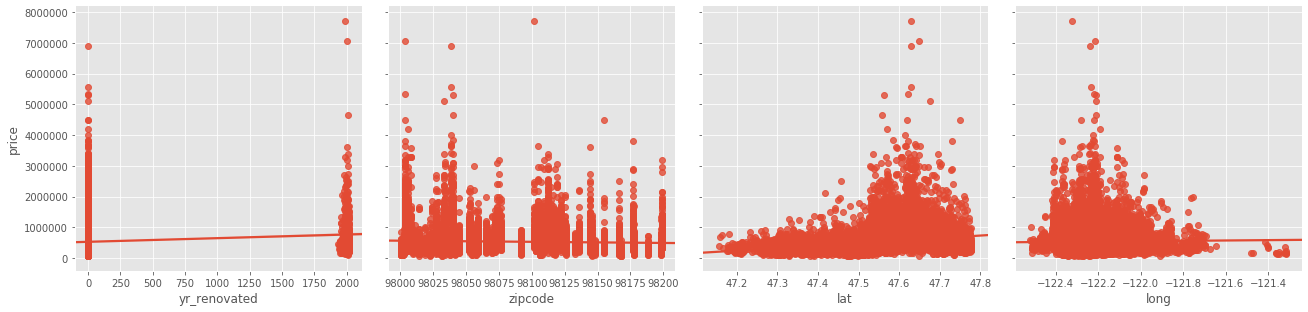

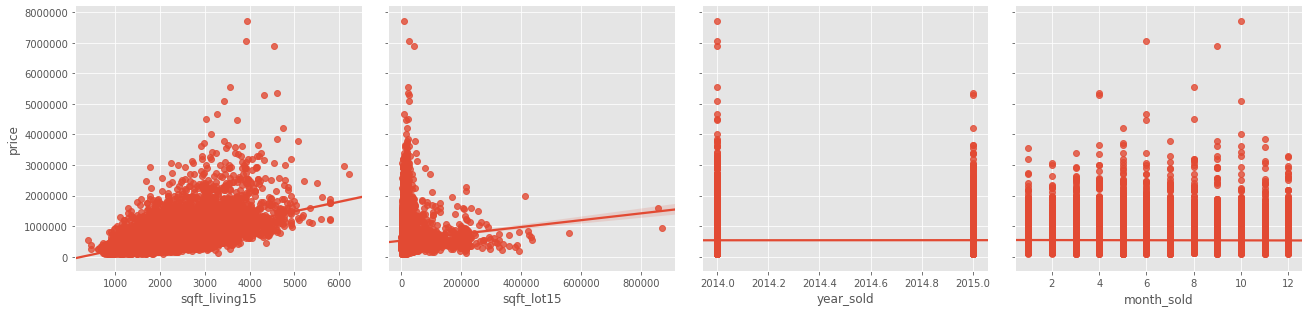

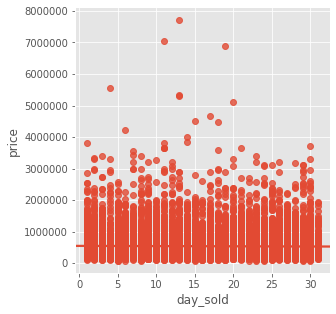

In [83]:
plot_relationship(data=clean_data, y_vars=['price'], x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'])
plot_relationship(data=clean_data, y_vars=['price'], x_vars=['floors', 'waterfront', 'view', 'condition'])
plot_relationship(data=clean_data, y_vars=['price'], x_vars=['grade', 'sqft_above', 'sqft_basement', 'yr_built'])
plot_relationship(data=clean_data, y_vars=['price'], x_vars=['yr_renovated', 'zipcode', 'lat', 'long'])
plot_relationship(data=clean_data, y_vars=['price'], x_vars=['sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold'])
plot_relationship(data=clean_data, y_vars=['price'], x_vars=['day_sold'])

In [40]:
# further preprocessing: 
# separate ordinal cat from normal cat variables - - OHE normal cat
# rerun